In [1]:
import pandas as pd
import re
import nltk
import random
import string
import os
import pandas as pd

In [13]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
def process_book(book_path, num_sentences=200, sentence_len=100):
    # Read the text book
    with open(book_path, 'r', encoding='utf-8') as f:
        book = f.read()


    # remove all the empty lines
    book = re.sub(r'\n\s*\n', '\n', book)


    # tokenize the book
    tokens = nltk.word_tokenize(book)


    # lower case all the words
    tokens = [w.lower() for w in tokens]


    # remove stopwords from tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [w for w in tokens if w not in stop_words]


    # remove punctuation from tokens
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]


    # remove remaining tokens that are not alphabetic
    tokens = [w for w in tokens if w.isalpha()]


    # get the author name
    author = re.search(r'Author: (.*)', book).group(1)


    # create random sentences from the tokens
    sentences = []
    for i in range(num_sentences):
        index = random.randint(0, len(tokens)-sentence_len)
        sentence = " ".join(tokens[index:index+sentence_len])
        sentences.append(sentence)


    # create a dataframe from the sentences associated with the author name as a label 
    df = pd.DataFrame({'sentence': sentences, 'author': author})


    return df

In [15]:
# define the folder path containing the books
folder_path ='F:/الكلية/DEBI/uottawa/NLP/assignment/assignment 3/BOOKS'

# create an empty dataframe to store the processed books
df_books = pd.DataFrame(columns=['sentence', 'author'])

# loop through all the files in the folder
for filename in os.listdir(folder_path):
    # check if the file is a text file
    print(filename)
    if filename.endswith('.txt'):
        # get the full path of the file
        file_path = os.path.join(folder_path, filename)
        # process the book and append the resulting dataframe to the main dataframe
        df_book = process_book(file_path)
        df_books = pd.concat([df_books, df_book], ignore_index=True)

# print the first few rows of the resulting dataframe
df_books.head()


A fighting man of Mars.txt
A Journey to the Centre of the Earth.txt
The Eyes Have It.txt
The Lost World.txt
The War of the Worlds.txt


,sentence,author
0,lost consciousness realized given drugged wine...,Edgar Rice Burroughs
1,iii cornered iv tavia v pits vi sentenced die ...,Edgar Rice Burroughs
2,knew would leave silent jhama slid air slightl...,Edgar Rice Burroughs
3,truce commanders two boats exchanged words jah...,Edgar Rice Burroughs
4,foot strange doubtless unhospitable country ug...,Edgar Rice Burroughs


In [16]:
df_books.tail()

,sentence,author
995,bulk size perhaps bear rising slowly painfully...,H. G. Wells
996,realised martians might purpose destruction de...,H. G. Wells
997,infinite danger starvation still terrible deat...,H. G. Wells
998,hailed halted hurried towards lieutenant coupl...,H. G. Wells
999,house told expected london six clock train wat...,H. G. Wells


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df_books['author'])

ValueError: could not convert string to float: 'Edgar Rice Burroughs'

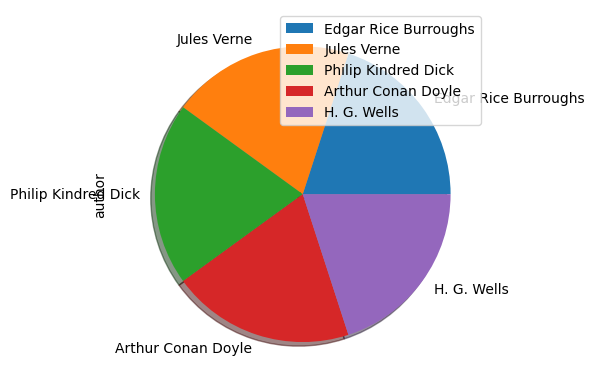

In [18]:
df_books['author'].value_counts().plot.pie( shadow = True)
plt.legend()
plt.show()

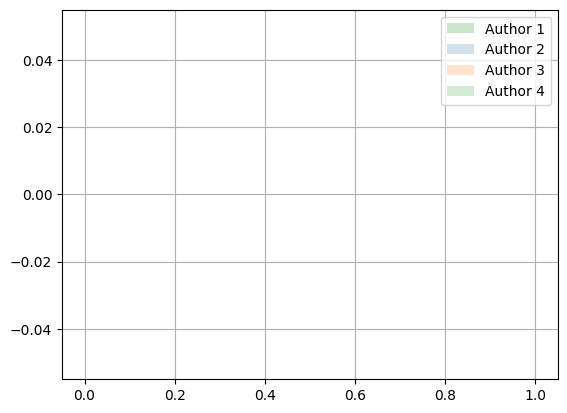

In [19]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books[df_books['author']==0]['char_length'].hist(label=df_books['author'],alpha=0.2,color=['green'] )
df_books[df_books['author']==1]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==2]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==3]['char_length'].hist(label=df_books['author'],alpha=0.2)
df_books[df_books['author']==4]['char_length'].hist(label=df_books['author'],alpha=0.2)
plt.legend(['Author 1','Author 2','Author 3','Author 4'])


In [20]:
%pip install WordCloud

     -------------------------------------- 152.5/152.5 kB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
df_books.to_csv("ahmed.csv")

Series([], Name: sentence, dtype: object)


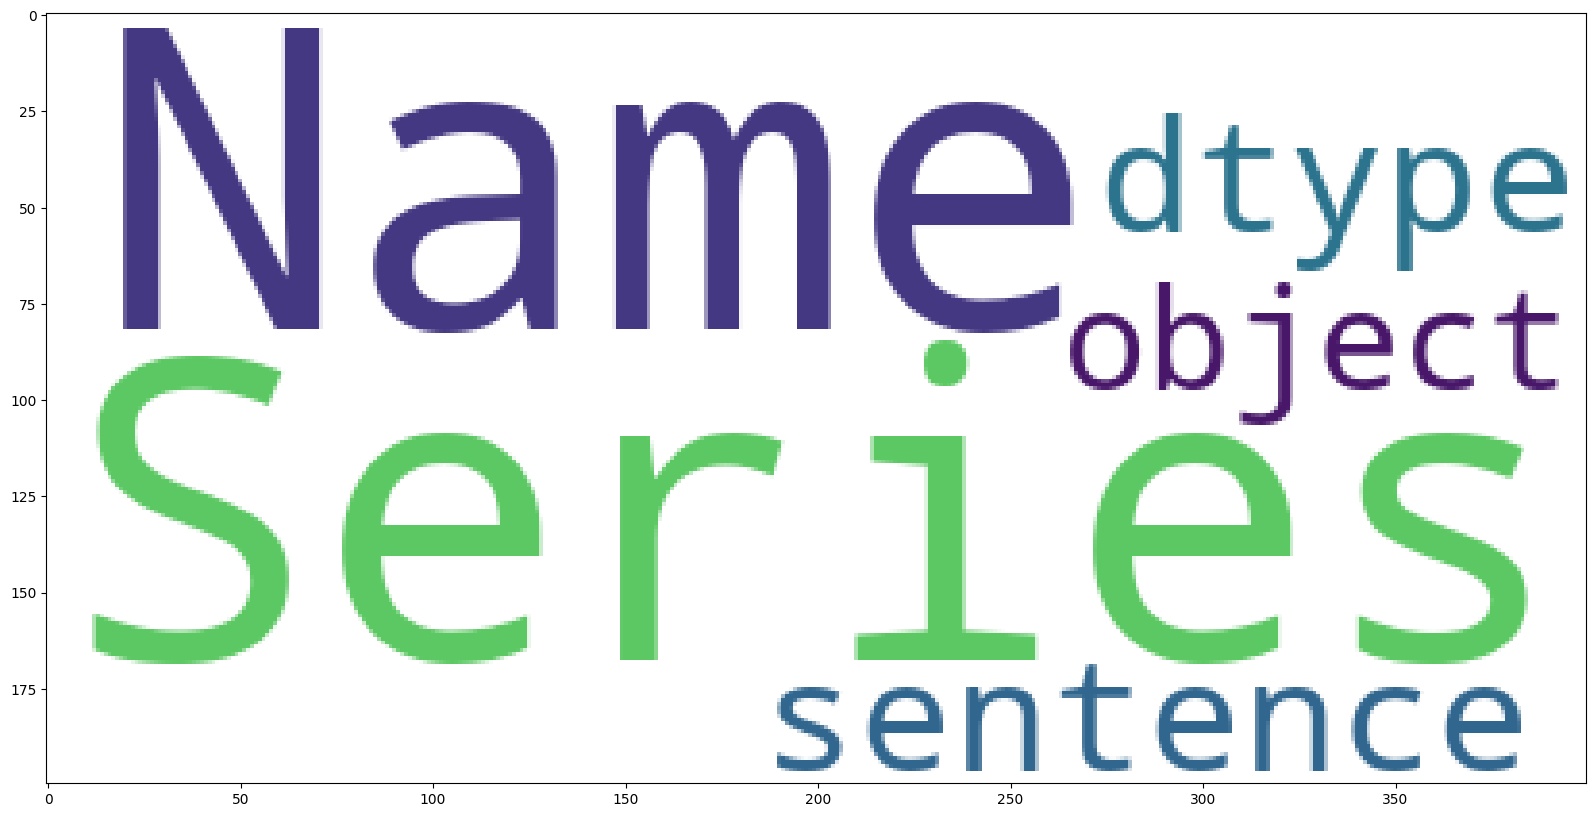

In [30]:
from wordcloud import WordCloud
import numpy as np

#tweet_mask = np.array(Image.open("twitter-logo-png-transparent.png"))
wc = WordCloud(collocations=False,
               background_color="white",
               max_words=200,
               contour_color='steelblue',
               contour_width=16,)

# Generate a wordcloud
print(df_books[df_books["author"]==0]["sentence"])
#print(df_books)
wc.generate(str(df_books[df_books['author']==3]['sentence']))


# show
plt.figure(figsize=[20,10])
plt.imshow(wc)

plt.show()

In [31]:
df_books['char_length']=df_books['sentence'].apply(len)
df_books


,sentence,author,char_length
0,lost consciousness realized given drugged wine...,Edgar Rice Burroughs,693
1,iii cornered iv tavia v pits vi sentenced die ...,Edgar Rice Burroughs,696
2,knew would leave silent jhama slid air slightl...,Edgar Rice Burroughs,660
3,truce commanders two boats exchanged words jah...,Edgar Rice Burroughs,692
4,foot strange doubtless unhospitable country ug...,Edgar Rice Burroughs,702
...,...,...,...
995,bulk size perhaps bear rising slowly painfully...,H. G. Wells,753
996,realised martians might purpose destruction de...,H. G. Wells,693
997,infinite danger starvation still terrible deat...,H. G. Wells,743
998,hailed halted hurried towards lieutenant coupl...,H. G. Wells,671


In [32]:
import pandas as pd
import nltk

In [33]:
# split the data to X and y
X = df_books['sentence']
y = df_books['author']

In [34]:
# transform the data to a BOW
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
count_array = X_dtm.toarray()
df = pd.DataFrame(count_array,columns = vect.get_feature_names())
df

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abandonment,abbey,abdicating,abduct,abducting,abduction,abductors,...,youthful,zambo,zareba,zeal,zeiss,zode,zoological,zoologist,zoology,zoophytes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
%pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

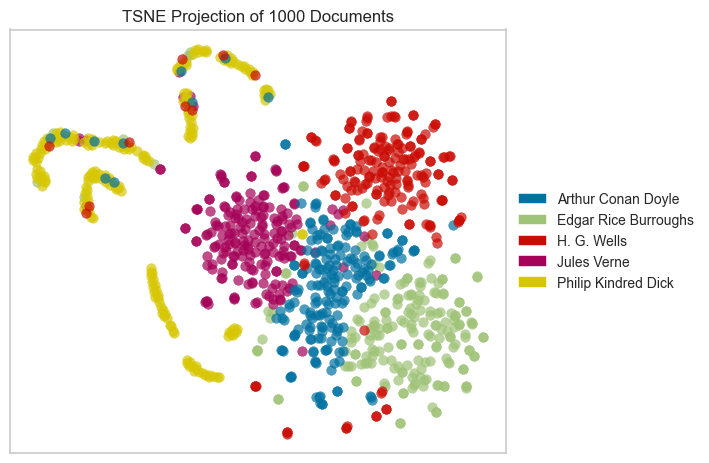

<AxesSubplot:title={'center':'TSNE Projection of 1000 Documents'}>

In [38]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df,df_books['author'])

tsne.show()


In [46]:
# transform the data to a tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_books["sentence"])
#print(tfidf_vectorizer_vectors.toarray())
#print(tfidf_vectorizer.get_feature_names())
df1 = pd.DataFrame(tfidf_vectorizer_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names())


df1

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abandoned,abandoning,abandonment,abbey,abdicating,abduct,abducting,abduction,abductors,...,youthful,zambo,zareba,zeal,zeiss,zode,zoological,zoologist,zoology,zoophytes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

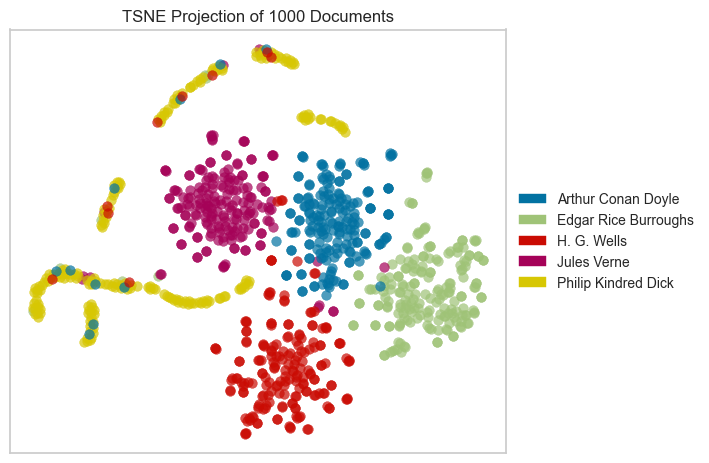

In [47]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df1,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()

In [48]:
#get elements from the sparse matrix
X_dtm[0, 0:1000].todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [49]:
# transfor y to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [11]:
set(y)

{0, 1, 2, 3, 4}

In [12]:
# get the class names
class_names = le.classes_
class_names

array(['Arthur Conan Doyle', 'Edgar Rice Burroughs', 'H. G. Wells',
       'Jules Verne', 'Philip Kindred Dick'], dtype=object)

In [13]:
# split the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.2, random_state=1)


In [14]:
# create a function to train and test the model with different performance metrics
from sklearn import metrics
def train_test_model(model, X_train, X_test, y_train, y_test):
    #print model name
    print(model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred_class = model.predict(X_test)
    print("-"*50)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))
    print("-"*50)
    print('Confusion Matrix: ', metrics.confusion_matrix(y_test, y_pred_class))
    print("-"*50)
    print('Classification Report:\n ', metrics.classification_report(y_test, y_pred_class))
    return model



In [15]:
# train and test the model with Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = train_test_model(nb, X_train, X_test, y_train, y_test)

MultinomialNB
--------------------------------------------------
Accuracy:  0.945
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 0  0 31  2  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       1.00      0.93      0.96        41
           2       1.00      0.86      0.93        36
           3       0.94      0.94      0.94        33
           4       0.85      1.00      0.92        50

    accuracy                           0.94       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.95      0.94      0.95       200



In [16]:
# train and test the model with XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb = train_test_model(xgb, X_train, X_test, y_train, y_test)

XGBClassifier
--------------------------------------------------
Accuracy:  0.92
--------------------------------------------------
Confusion Matrix:  [[37  2  0  0  1]
 [ 1 38  0  2  0]
 [ 1  0 30  3  2]
 [ 1  0  1 29  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.95      0.93      0.94        41
           2       0.97      0.83      0.90        36
           3       0.85      0.88      0.87        33
           4       0.91      1.00      0.95        50

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.92       200
weighted avg       0.92      0.92      0.92       200



In [17]:
# train and test the model with SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm = train_test_model(svm, X_train, X_test, y_train, y_test)

SVC
--------------------------------------------------
Accuracy:  0.95
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 0 38  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  0 50]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       1.00      0.93      0.96        41
           2       1.00      0.89      0.94        36
           3       1.00      0.94      0.97        33
           4       0.85      1.00      0.92        50

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [18]:
# train and test the model with Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = train_test_model(rf, X_train, X_test, y_train, y_test)


RandomForestClassifier
--------------------------------------------------
Accuracy:  0.935
--------------------------------------------------
Confusion Matrix:  [[39  0  0  0  1]
 [ 1 37  0  0  3]
 [ 1  0 32  0  3]
 [ 0  0  0 31  2]
 [ 0  0  0  2 48]]
--------------------------------------------------
Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       1.00      0.90      0.95        41
           2       1.00      0.89      0.94        36
           3       0.94      0.94      0.94        33
           4       0.84      0.96      0.90        50

    accuracy                           0.94       200
   macro avg       0.95      0.93      0.94       200
weighted avg       0.94      0.94      0.94       200



In [57]:
#N_gram
count_vect = CountVectorizer(ngram_range=(3,3))
ngram_vectors=count_vect.fit_transform(df_books["sentence"])
df2 = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df2

c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon horizontal sea,abandon sanoma tora,abandon us uncle,abandon weapons ammunition,abandoned alone dreadful,abandoned altogether idea,abandoned attempt communication,abandoned boat small,abandoned region eternal,abandoned ship motion,...,zoological institute hall,zoological institute presents,zoological institute wadley,zoological institute would,zoological science great,zoologist nt man,zoology belongs large,zoology little known,zoology unhappily crushed,zoophytes period transition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\asdcx\Anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

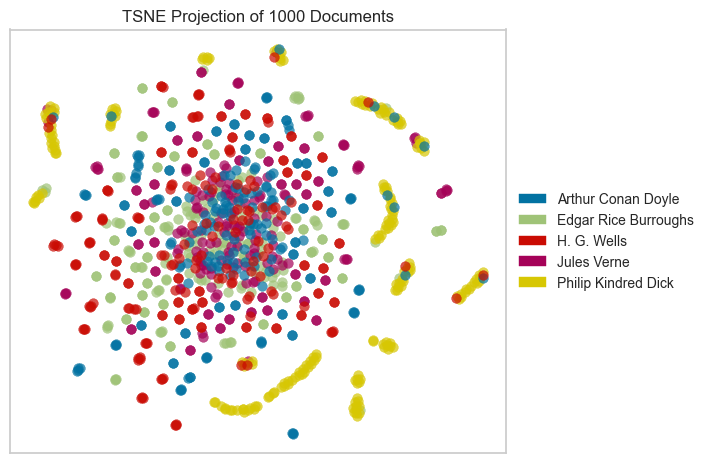

In [58]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(df2,df_books['author'])

tsne.show(legend=["Author 1","Author 2","Author 3","Author 4","Author 5"])
plt.show()